## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

 - научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
 
 - сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;

 - проанализировать основные признаки, наиболее сильно влияющие на отток;
 
 - сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;

    2) предложить меры по снижению оттока;

    3) определить другие особенности взаимодействия с клиентами.

## Описание данных

'Churn' — факт оттока в текущем месяце;

'gender' — пол;

'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

'Partner' — сотрудник компании-партнёра клуба;

'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга»;

'Phone' — наличие контактного телефона;

'Age' — возраст;

'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);

'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

'Group_visits' — факт посещения групповых занятий;

'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Открытие и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly import graph_objects as go 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
gym.duplicated().sum()

0

In [5]:
gym.columns = gym.columns.str.lower()

In [6]:
gym.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [7]:
gym.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [8]:
gym['month_to_end_contract'].value_counts()

1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: month_to_end_contract, dtype: int64

In [9]:
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype(int)

### Вывод

При загрузки данных критичных ошибок не обнаружено, т.е. отсутствуют пропуски и дубликаты. Названия столбцов были приведены к нижнему регистру. Изменен тип данных для столбца 'month_to_end_contract' с float на int, т.к. все данные столбца - целочисленные.

## Исследовательский анализ данных (EDA)

Изучим средние значения и стандартные отклонения.

In [10]:
gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [11]:
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

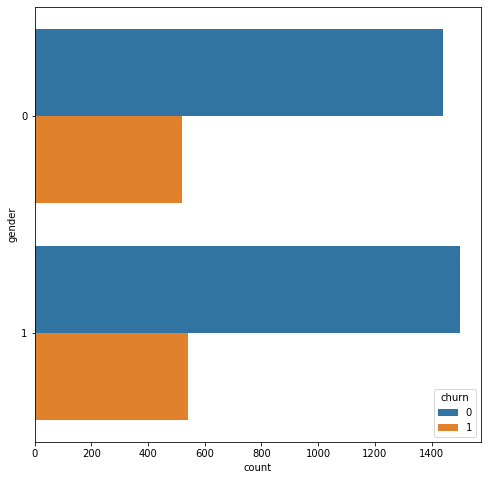

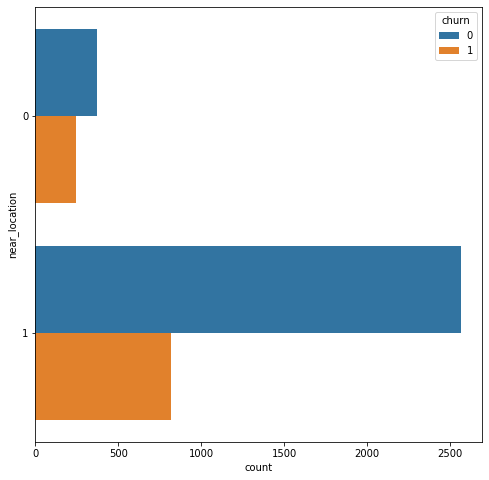

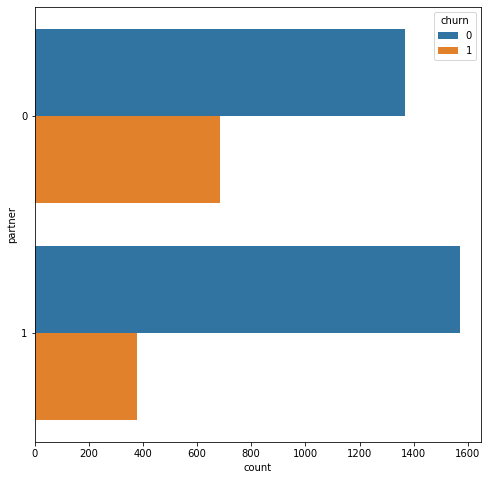

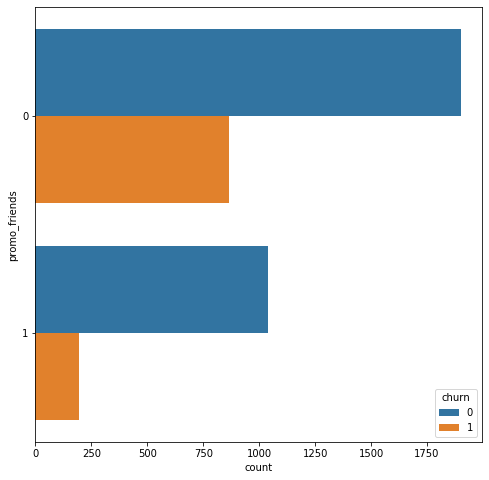

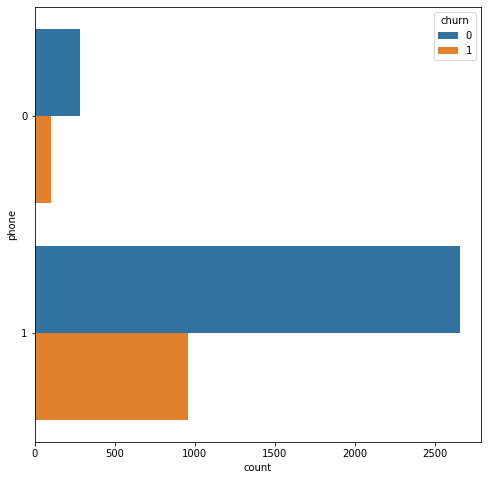

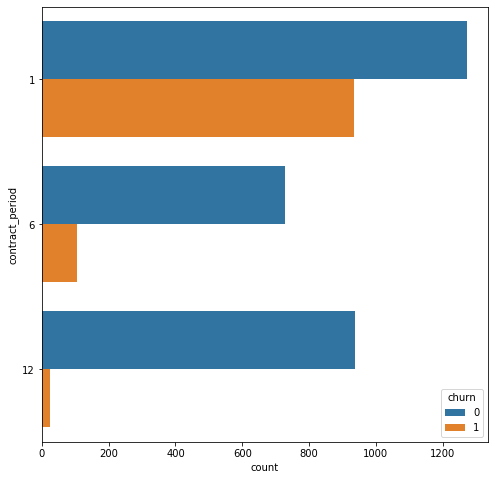

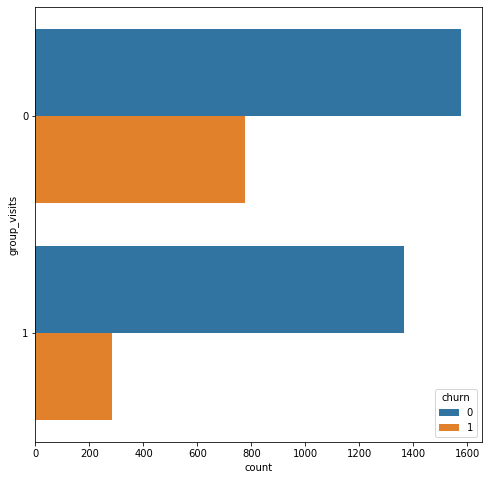

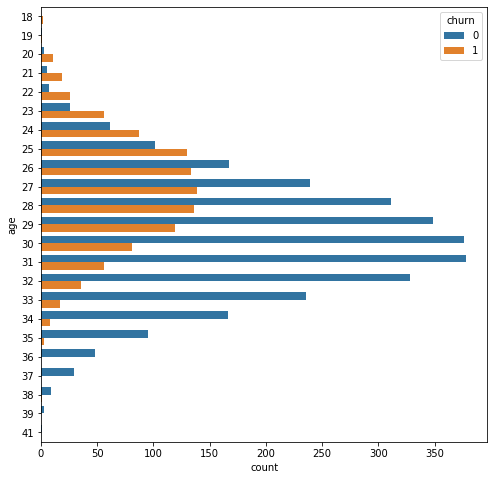

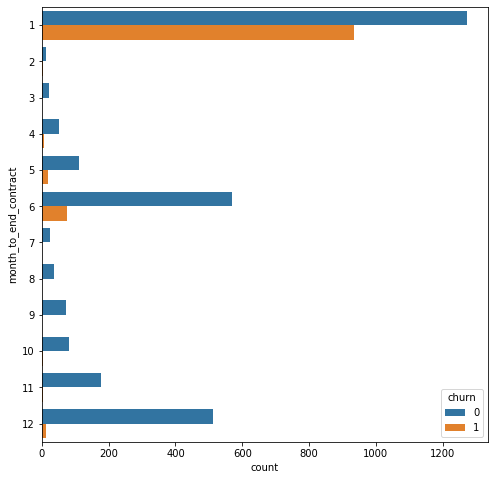

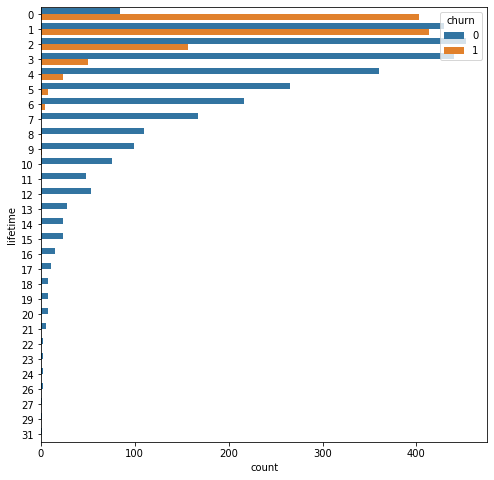

In [12]:
for col in gym.drop(['churn','avg_additional_charges_total',
                     'avg_class_frequency_total','avg_class_frequency_current_month'],
                    axis = 1).columns:
    plt.figure(figsize = (8,8))
    sns.countplot(y=col, hue='churn',  data=gym)
    plt.show()

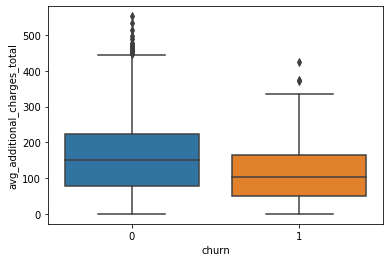

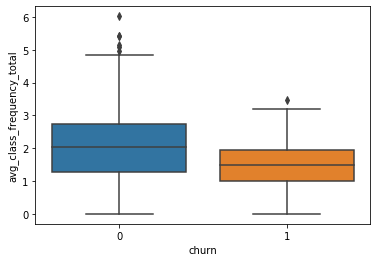

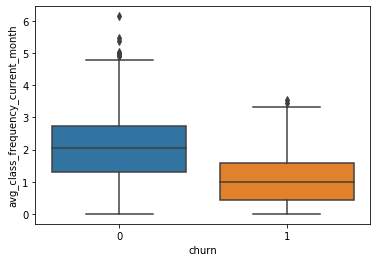

In [13]:
not_hyst = ['avg_additional_charges_total',
            'avg_class_frequency_total','avg_class_frequency_current_month']
for col in not_hyst:
    sns.boxplot(y=gym[col], x='churn',  data=gym)
    plt.show()

Построим матрицу корреляций

In [14]:
corr_gym = gym.corr()

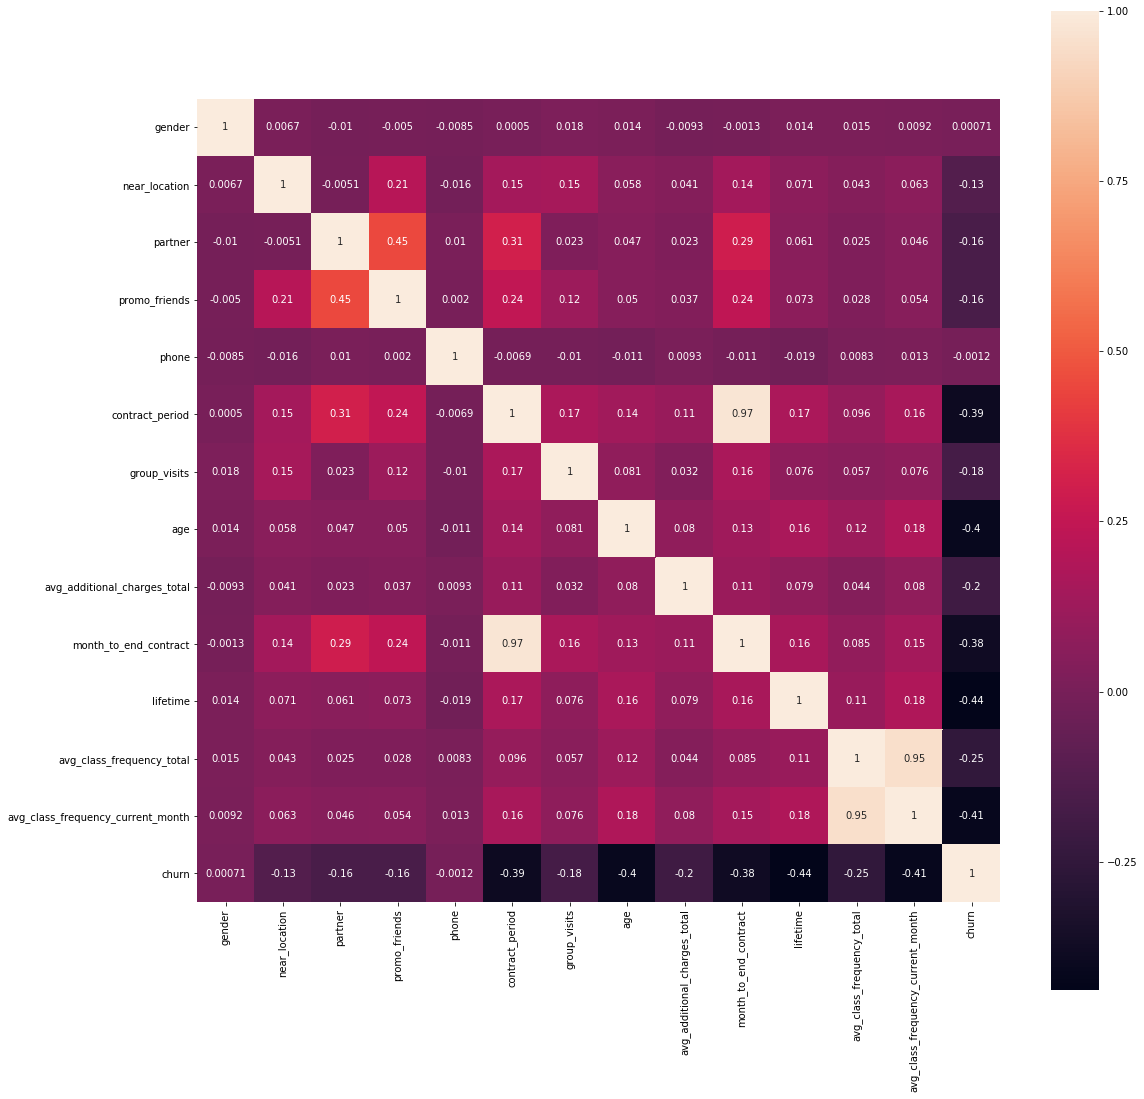

In [15]:
plt.figure(figsize = (18, 18))
sns.heatmap(corr_gym, square = True, annot = True)
plt.show()

### Вывод

На данном этапе мы рассмотрели средние значения и стандартные отклонения параметров, построили столбчатые гистограммы и распределение признаков для оттока и тех, кто остался, а также построили матрицу корреляций. Можно заметить, что мужчин и женщин почти одинаковое кол-во, большинство проживают или работают в том же районе, где и находится тренажерный зал, а также большинство клиентов оставляют свой контактный телефон. Также хочу подметить, что клиенты, которые изначально пришли не по акции "приведи друга" с большей вероятностью остаются, чем те, которые воспользовались при первоначальной записи этой акцией. На основе матрицы корреляций выделим наиболее коррелирующиеся параметры:  срок до окончания текущего действующего абонемента и длительность текущего действующего абонемента; средняя частота посещений в неделю за предыдущий месяц и суммарная выручка от других услуг фитнес-центра. А также заметна неплохая корреляцию у параметров: факт первоначальной записи в рамках акции «приведи друга» и сотрудник компании-партнёра клуба. В конце отметим отрицательную корреляцию, она наиболее заметна у параметров: факт оттока в текущем месяце и время с момента первого обращения в фитнес-центр; факт оттока в текущем месяце и средняя частота посещений в неделю за предыдущий месяц.

## Построим модель прогнозирования оттока клиентов

In [16]:
gym['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце

In [17]:
# разделяем данные на признаки (матрица X) и целевую переменную y
X = gym.drop('churn', axis = 1)
y = gym['churn'] 

In [18]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [19]:
# стандартизируем данные 
scaler = StandardScaler()
scaler.fit(X_train)  
X_train_st = scaler.transform(X_train)      # стандартизируем обучающую выборку 
X_test_st = scaler.transform(X_test)       # стандартизируем тестовую выборку

In [20]:
# Используем логистическую регрессию
model = LogisticRegression(solver='liblinear')

In [21]:
#обучим модель
model.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# бинарный прогноз
predictions = model.predict(X_test_st)

In [23]:
# Вывод метрик
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.85
Recall: 0.83


In [24]:
#Теперь задействуем случайный лес
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

In [25]:
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
rf_predictions = rf_model.predict(X_test_st)

In [27]:
# Вывод метрик
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81


### Вывод

На данном этапе мы построили модель прогнозирования оттока клиентов двумя способами: логистической регрессией и случайным лесом, где целевой признак - факт оттока клиента в следующем месяце. В целом, показатели метрик высокие у обоих способов, у них одинаковая доля верно угаданных ответов - 92%, также точность и полнота превышают отметку в 80%. На основе наших метрик можно сделать вывод, что логистическая регрессия и случайный лес практически не отличаются, но всё же логистическая регрессия показывает себя чуть лучше в метриках Precision и Recall.

## Кластеризация клиентов

In [28]:
#убираем стоблец churn
gym_new = gym.drop(['churn'], axis = 1)
gym_new.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078


Стандартизируем данные

In [29]:
sc_gym = scaler.fit_transform(gym_new)

Построим матрицу расстояний на стандартизованной матрице признаков и нарисуем дендрограмму.

In [30]:
linked = linkage(sc_gym, method = 'ward')

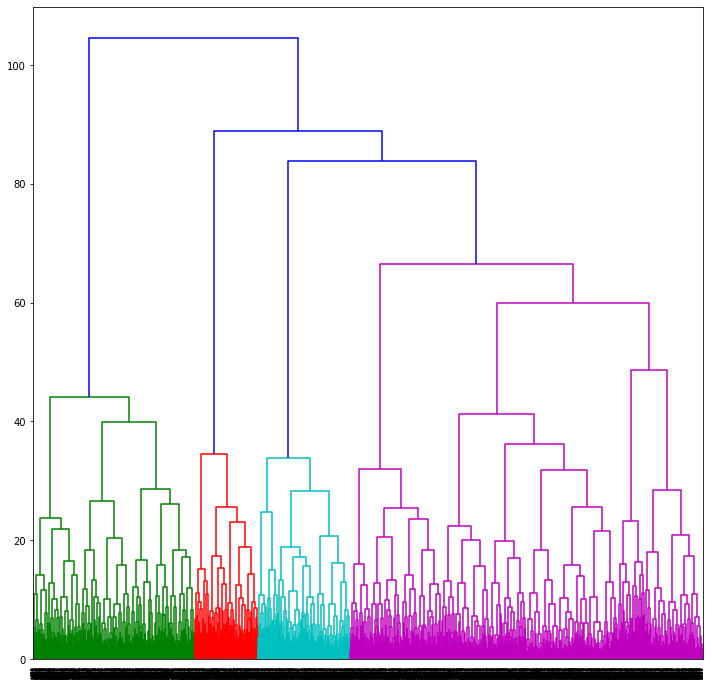

In [31]:
plt.figure(figsize = (12, 12))
dendrogram(linked, orientation='top')
plt.show() 

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

In [32]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state = 0)

In [33]:
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(sc_gym)

In [34]:
# сохраняем метки кластера в поле наших датасетов
gym['cluster_km'] = labels 
gym_new['cluster_km'] = labels 

Посмотрим на средние значения признаков для кластеров

In [35]:
gym_new.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473


Можно сразу отметить, что у одного кластера в среднем клиенты не оставляют свой контактный номер. А еще в одном кластере большая продолжительность контракта и большое кол-во, оставшихся месяцев по контракту. Также присутствует кластер, в котором среднем клиенты проживают или работают в другом районе относительно фитнес-центра.

Построим распределения признаков для кластеров

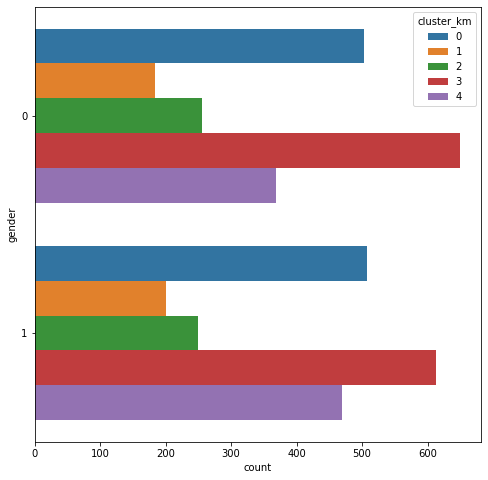

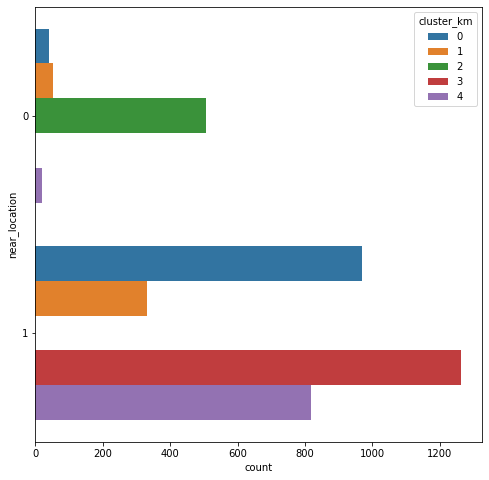

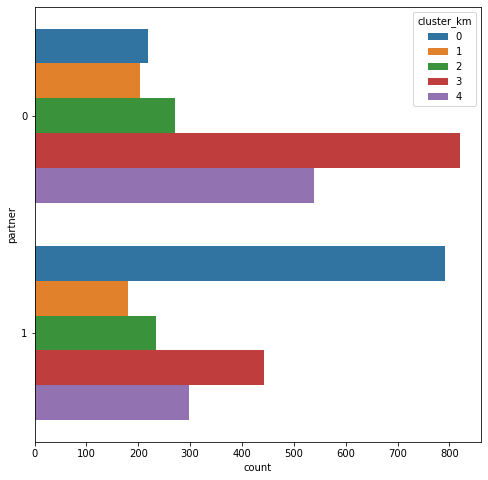

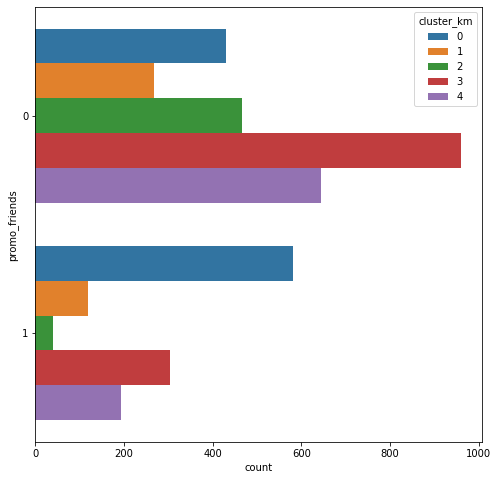

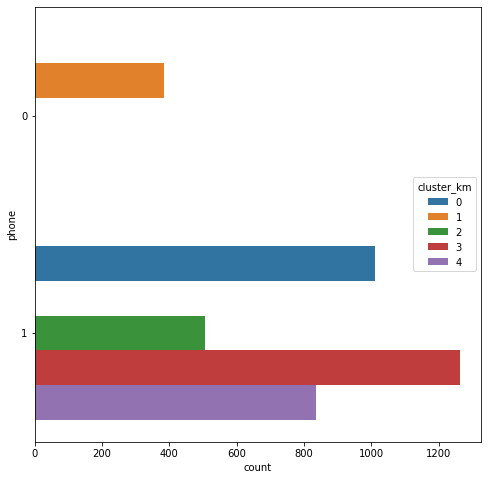

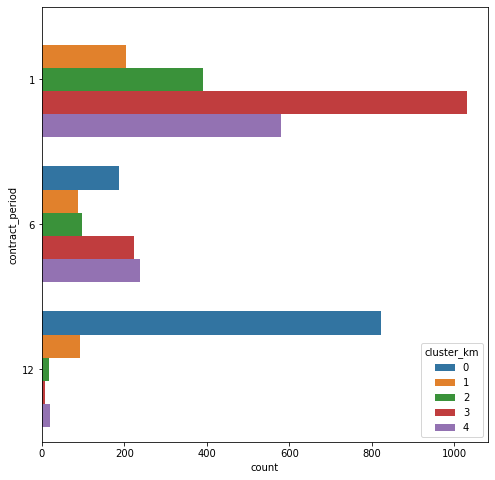

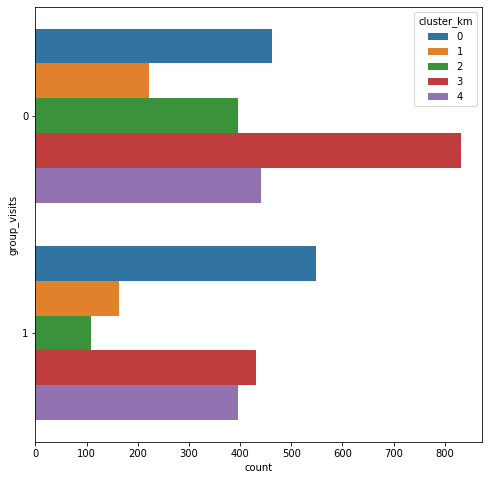

In [36]:
for col in gym_new.drop(['cluster_km', 'age', 
                         'avg_additional_charges_total','month_to_end_contract', 
                         'lifetime', 'avg_class_frequency_total', 
                         'avg_class_frequency_current_month'], axis = 1).columns:
    plt.figure(figsize = (8, 8))
    sns.countplot(data = gym_new, y=col, hue = 'cluster_km')
    plt.show()

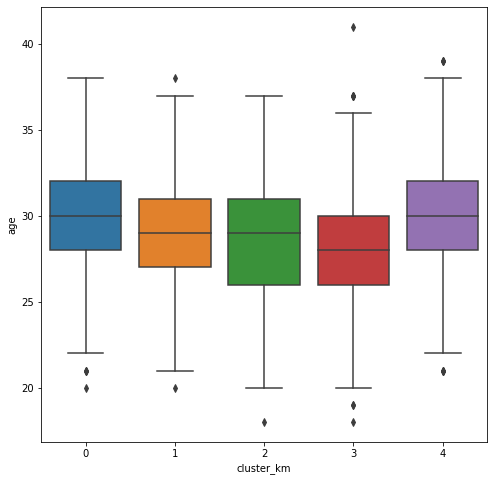

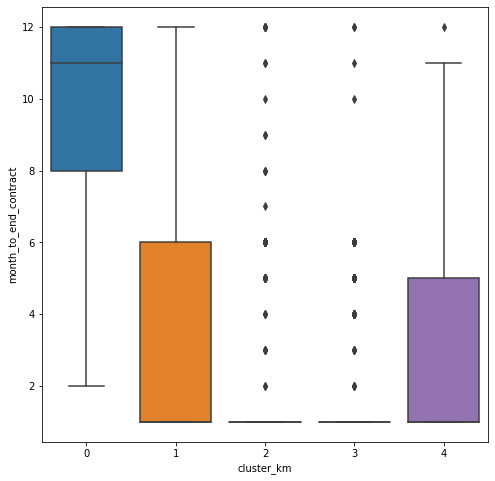

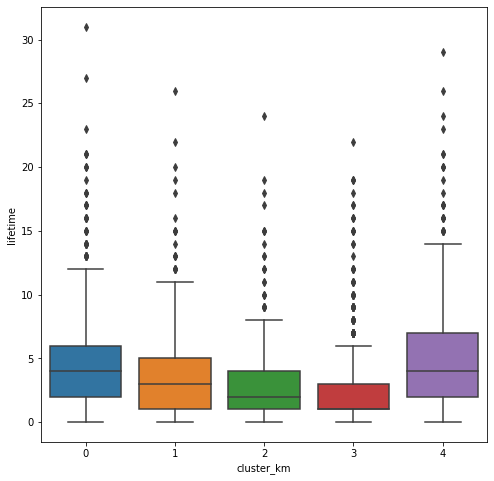

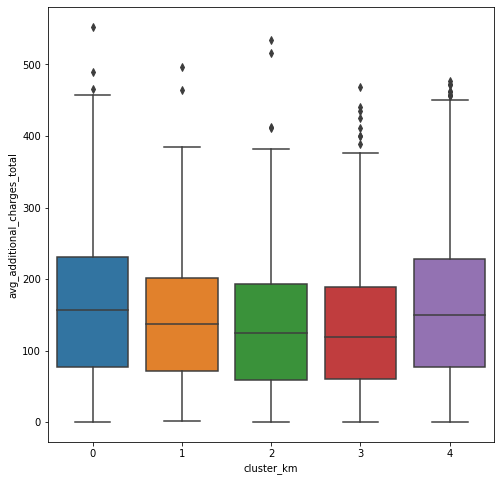

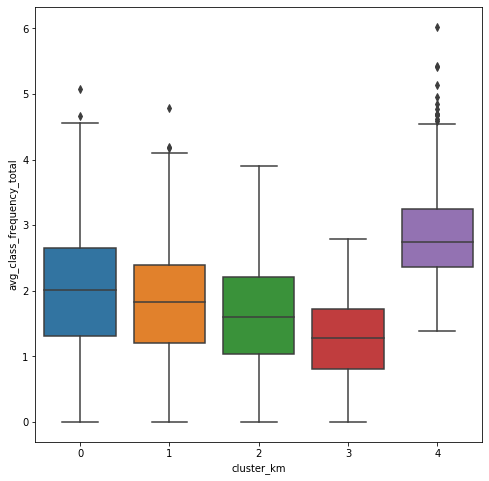

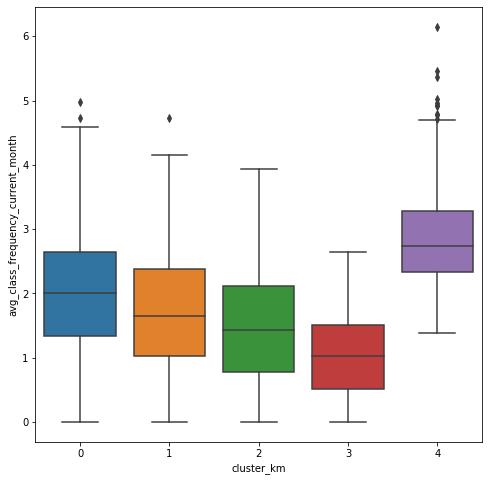

In [37]:
not_hyst1 = ['age', 'month_to_end_contract', 'lifetime', 
            'avg_additional_charges_total','avg_class_frequency_total',
            'avg_class_frequency_current_month']
for col in not_hyst1:
    plt.figure(figsize = (8, 8))
    sns.boxplot(y=gym_new[col], x='cluster_km',  data=gym_new)
    plt.show()

Распределение по возрасту и полу у кластеров практически одинаковы. У одного кластера значительно больше месяцев до окончания абонемента, а у двух кластеров большая часть пользователей имеют абонементы, которые закончились, либо они закончатся в течении месяца. В целом, нельзя определенно сказать, какие из этих признаков сильнее влияют на отток, след-но нужно отметить комлекс признаков.

Посчитаем долю оттока для каждого полученного кластера 

In [38]:
gym.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.027695
1    0.267532
2    0.443564
3    0.514263
4    0.068100
Name: churn, dtype: float64

### Вывод

На последнем этапе осуществлена кластеризация клиентов. Во-первых, удален столбец "Сhurn", затем стандартизировали данные, а после на основе матрицы расстояний построили дендрограмму. Далее, определили число кластеров - 5 и рассмотрели их средние значения показателей, и построили распределение признаков, и разбили доли оттока относительно кластеров. Отметим, что у одного кластера в среднем клиенты не оставляют свой контактный номер. А еще в одном кластере большая продолжительность контракта и большое кол-во, оставшихся месяцев по контракту. Также присутствует кластер, в котором среднем клиенты проживают или работают в другом районе относительно фитнес-центра. Перейдем к распределению. Распределение по возрасту и полу у кластеров практически одинаковы. У одного кластера значительно больше месяцев до окончания абонемента, а у двух кластеров большая часть пользователей имеют абонементы, которые закончились, либо они закончатся в течении месяца. В целом, нельзя определенно сказать, какие из этих признаков сильнее влияют на отток, след-но нужно отметить комлекс признаков. В конце сделаем вывод по оттоку у кластеров. Мы имеем два кластера, которые имееют отток в 50%, другие два кластера имеют показатель оттока ниже, чем 10%, а последний около 25%.

## Общий вывод и основные рекомендации по работе с клиентами

В данной работе мы прогнозировали вероятность оттока для каждого клиента. Провели исследовательский анализ предоставленной таблицы. Построили модель прогнозирования оттока клиентов двумя способами: логистическая регрессия и случайный лес, как оказалось логистическая регрессия показывает себя чуть лучше по показателям метрик. И в конце провели кластеризацию клиентов. 

Исходя из нашего исследования предложим следующие рекомендации для стратегии взаимодействия с клиентами и их удержания.

На самом деле, нельзя однозначно выделить признаки, которые влияют на отток пользователей.

Если мы рассмотрим удаленность, то два кластера с наименьшим оттоком живут близко к фитнес-центру. А также больше всего клиентов, живущих или работающих рядом, находятся в кластере с наибольшим оттоком клиентов.

Кластер клиентов, которые не оставили контактный телефон, имеют не самую большую долю оттока.

Остаток месяцев по контракту, скорее всего, является самым важным параметром, т.к. у двух кластеров с наибольшим оттоком осталось меньше месяца действия абонемента.

Кластер клиентов, которые изначально пришли по акции "Пригласи друга", имеет не особо большую долю оттока. След-но, делаем вывод, что это акция имеет некоторый успех.

Рекомендации:

1. Предлагаю продлить или улучшить акцию "Пригласи друга", т.к. акция имеет хорошие показатели в целях привлечения клиентов, а также кластер с наибольшим кол-во клиентов, которые пришли по этой акции, имеет не особо высокий показатель оттока. Всем известно, что с другом заниматься приятнее.

2. Можно предложить специальные предложения клиентам, у которых абонемент подходит к концу.

3. Добавить число бесплатных("пробных") групповых занятий или сделать на них скидку. 